In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

pd.options.display.max_rows = 8

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''
Загружаем датасет
'''

'\nЗагружаем датасет\n'

In [4]:
df = pd.read_csv('App_Rent.csv', sep=';')
df

,rent,s,floor,rooms,district,walls,furniture
0,15000,35.0,5,1,3,1,1
1,16500,31.0,2,1,2,0,1
2,18000,30.0,4,1,3,1,1
3,30000,55.0,1,2,3,1,1
...,...,...,...,...,...,...,...
126,28500,54.0,1,2,1,1,1
127,19500,54.0,3,2,2,0,1
128,10500,12.0,4,1,3,1,0
129,19500,68.0,4,2,2,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rent       130 non-null    int64  
 1   s          130 non-null    float64
 2   floor      130 non-null    int64  
 3   rooms      130 non-null    int64  
 4   district   130 non-null    int64  
 5   walls      130 non-null    int64  
 6   furniture  130 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 7.2 KB


In [6]:
'''
Предварительная обработка.
Гистограммы.
'''

'\nПредварительная обработка.\nГистограммы.\n'

<AxesSubplot:>

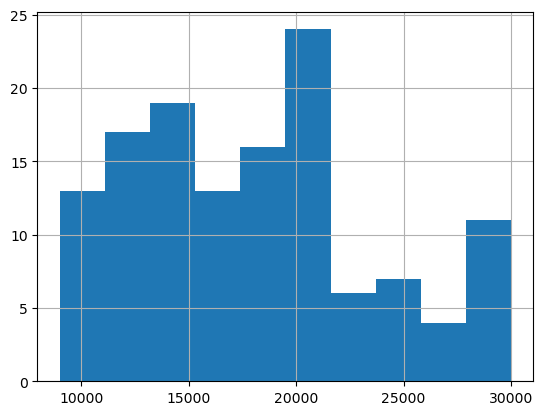

In [7]:
df['rent'].hist()

<AxesSubplot:>

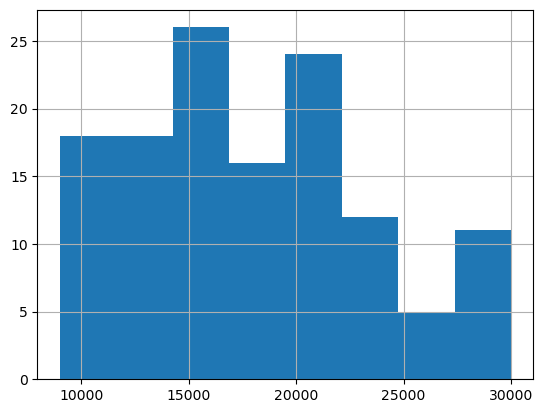

In [8]:
df['rent'].hist(bins=8)

<AxesSubplot:>

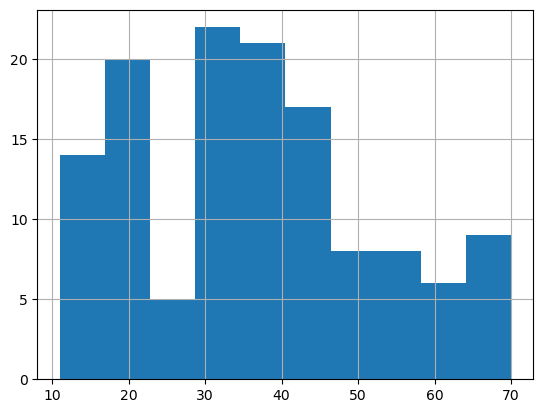

In [9]:
df['s'].hist()

<AxesSubplot:>

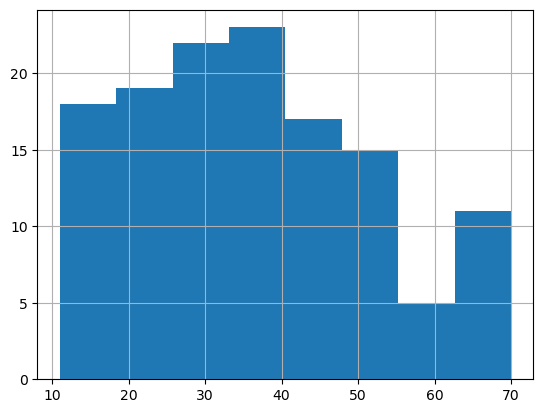

In [10]:
df['s'].hist(bins=8)

In [11]:
'''
Описательные статистики
'''

'\nОписательные статистики\n'

In [12]:
df.describe()

,rent,s,floor,rooms,district,walls,furniture
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,17890.384615,36.439231,4.153846,1.376923,2.076923,0.615385,0.838462
std,5608.686840,15.753831,2.680569,0.613358,0.812837,0.488386,0.369451
min,9000.000000,11.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,13500.000000,21.250000,2.000000,1.000000,1.000000,0.000000,1.000000
50%,18000.000000,36.000000,3.000000,1.000000,2.000000,1.000000,1.000000
75%,21000.000000,45.000000,5.000000,2.000000,3.000000,1.000000,1.000000
max,30000.000000,70.000000,12.000000,3.000000,3.000000,1.000000,1.000000


In [13]:
df.drop(['floor', 'district', 'walls', 'furniture'], axis=1).describe()

,rent,s,rooms
count,130.000000,130.000000,130.000000
mean,17890.384615,36.439231,1.376923
std,5608.686840,15.753831,0.613358
min,9000.000000,11.000000,1.000000
25%,13500.000000,21.250000,1.000000
50%,18000.000000,36.000000,1.000000
75%,21000.000000,45.000000,2.000000
max,30000.000000,70.000000,3.000000


In [14]:
df['rooms'].unique()

array([1, 2, 3], dtype=int64)

In [15]:
df[['rent','s']].mean() # среднее

rent    17890.384615
s          36.439231
dtype: float64

In [16]:
df[['rent','s']].std()  # средне квадратическое отклонение

rent    5608.686840
s         15.753831
dtype: float64

In [17]:
df[['rent','s']].skew() # коэффициент асимметрии

rent    0.536873
s       0.328439
dtype: float64

In [18]:
df[['rent','s']].kurtosis() # коэффициент эксцесса

rent   -0.350727
s      -0.706654
dtype: float64

In [19]:
'''
Проверка нормальности по критерию Шапиро-Уилка
'''

'\nПроверка нормальности по критерию Шапиро-Уилка\n'

In [20]:
stats.shapiro(df['rent'])

ShapiroResult(statistic=0.9490651488304138, pvalue=9.61164478212595e-05)

In [21]:
stats.shapiro(df['s'])

ShapiroResult(statistic=0.9606573581695557, pvalue=0.0008220362360589206)

In [22]:
'''
Сравнение групп.
Анализ влияния категориальных признаков на количественные показатели. Критерии сравнения групп.
Влияние на целевой показатель Rent.
'''

'\nСравнение групп.\nАнализ влияния категориальных признаков на количественные показатели. Критерии сравнения групп.\nВлияние на целевой показатель Rent.\n'

In [23]:
df.groupby('walls')[['rent']].mean()

,rent
walls,
0,17790.000
1,17953.125


In [24]:
'''
Построим гистограммы
'''

'\nПостроим гистограммы\n'

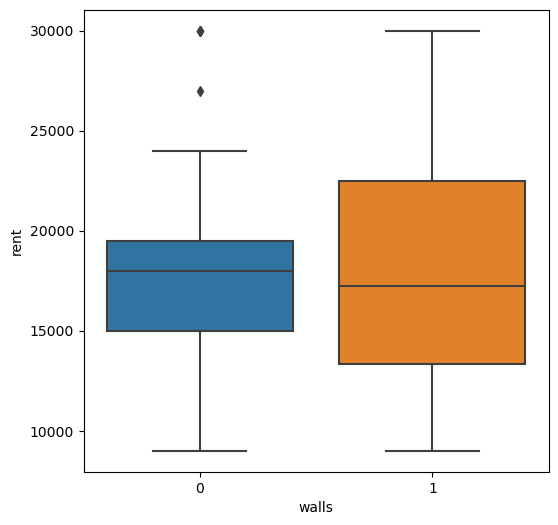

In [25]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='rent', data=df)

In [26]:
'''
Критерий Шапиро
'''

'\nКритерий Шапиро\n'

In [27]:
df_w0 = df[df['walls']==0]
df_w1 = df[df['walls']==1]
print(stats.shapiro(df_w0['rent']))
print(stats.shapiro(df_w1['rent']))

ShapiroResult(statistic=0.933836817741394, pvalue=0.007742355111986399)
ShapiroResult(statistic=0.9406318664550781, pvalue=0.0010412109550088644)


In [28]:
'''
Критерий Манна-Уитни.
T-критерий не проходит, т.к. p-value > 0.05
'''

'\nКритерий Манна-Уитни.\nT-критерий не проходит, т.к. p-value > 0.05\n'

In [29]:
#scipy.stats.ttest_ind(df_w0['rent'],df_w1['rent'])
scipy.stats.mannwhitneyu(df_w0['rent'],df_w1['rent'])

MannwhitneyuResult(statistic=2046.5, pvalue=0.8251982325544291)

In [30]:
'''
Арендная плата - мебель
'''

'\nАрендная плата - мебель\n'

In [31]:
df.groupby('furniture')[['rent']].mean()

,rent
furniture,
0,12535.714286
1,18922.018349


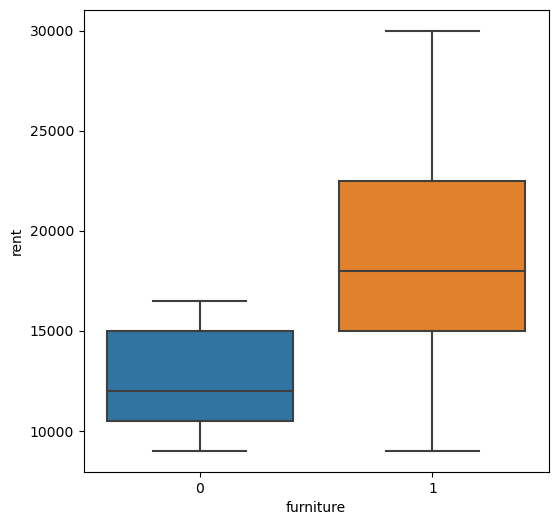

In [32]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='furniture', y='rent', data=df)

In [33]:
df_f0 = df[df['furniture']==0]
df_f1 = df[df['furniture']==1]
print(stats.shapiro(df_f0['rent']))
print(stats.shapiro(df_f1['rent']))

ShapiroResult(statistic=0.8862565159797668, pvalue=0.019116604700684547)
ShapiroResult(statistic=0.9571584463119507, pvalue=0.001457675127312541)


In [34]:
'''
Используем метод Манна-Уитни.
Т-тест не проходит.
'''

'\nИспользуем метод Манна-Уитни.\nТ-тест не проходит.\n'

In [35]:
#scipy.stats.ttest_ind(df_f0['rent'],df_f1['rent'])
scipy.stats.mannwhitneyu(df_f0['rent'],df_f1['rent'])

MannwhitneyuResult(statistic=325.5, pvalue=2.0462013181855786e-07)

In [36]:
'''
Арендная плата - район
'''

'\nАрендная плата - район\n'

In [37]:
df.groupby('district')[['rent']].mean()

,rent
district,
1,19894.736842
2,15375.000000
3,18609.375000


In [38]:
df.groupby('district')[['rent']].count()

,rent
district,
1,38
2,44
3,48


In [39]:
'''
Построим боксплоты по районам
'''

'\nПостроим боксплоты по районам\n'

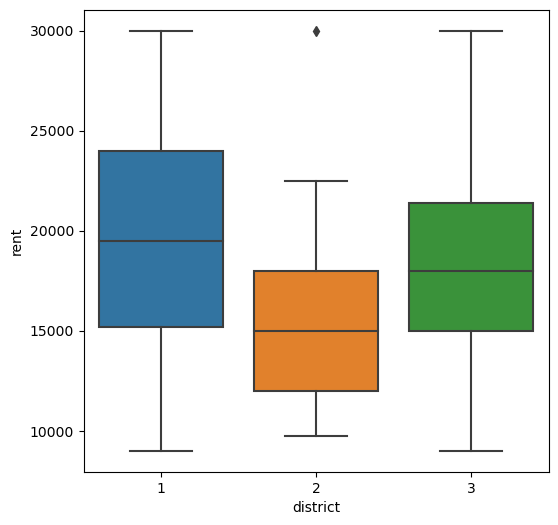

In [40]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='rent', data=df)

In [41]:
'''
Уберем выброс
'''

'\nУберем выброс\n'

In [42]:
df.loc[(df['rent'] > 25000) & (df['district'] == 2)]

,rent,s,floor,rooms,district,walls,furniture
37,30000,64.0,3,3,2,0,1


In [43]:
'''
Удалим запись с номером 37
'''

'\nУдалим запись с номером 37\n'

In [44]:
df=df.drop(df.index[[37]])

In [45]:
df_d1=np.array(df[df['district']==1]['rent'])
df_d2=np.array(df[df['district']==2]['rent'])
df_d3=np.array(df[df['district']==3]['rent'])

print(stats.shapiro(df_d1))
print(stats.shapiro(df_d2))
print(stats.shapiro(df_d3))

ShapiroResult(statistic=0.9700818657875061, pvalue=0.3938768208026886)
ShapiroResult(statistic=0.9333935976028442, pvalue=0.015224754810333252)
ShapiroResult(statistic=0.9480535984039307, pvalue=0.03346915543079376)


In [46]:
'''
По второй и третьей группах гипортеза о нормальности отклоняется.
Не можем применить параметрический дисперсионный анализ.
Используем метод Краскалл-Уоллеса, а не One way ANOWA
'''

'\nПо второй и третьей группах гипортеза о нормальности отклоняется.\nНе можем применить параметрический дисперсионный анализ.\nИспользуем метод Краскалл-Уоллеса, а не One way ANOWA\n'

In [47]:
#stats.f_oneway(df_d1,df_d2,df_d3) # One way ANOVA
stats.mstats.kruskalwallis(df_d1,df_d2,df_d3)

KruskalResult(statistic=16.52600709960518, pvalue=0.00025788326161446976)

In [48]:
'''
P-value < 0.05. Отклоняем Н0 о равенстве. Принимаем, что различия статистически значимы.
'''

'\nP-value < 0.05. Отклоняем Н0 о равенстве. Принимаем, что различия статистически значимы.\n'

In [49]:
'''
Влияние категориальных признаков на факторный показатель s (площадь)
'''

'\nВлияние категориальных признаков на факторный показатель s (площадь)\n'

In [50]:
df.groupby('walls')[['s']].mean()

,s
walls,
0,39.042857
1,34.500000


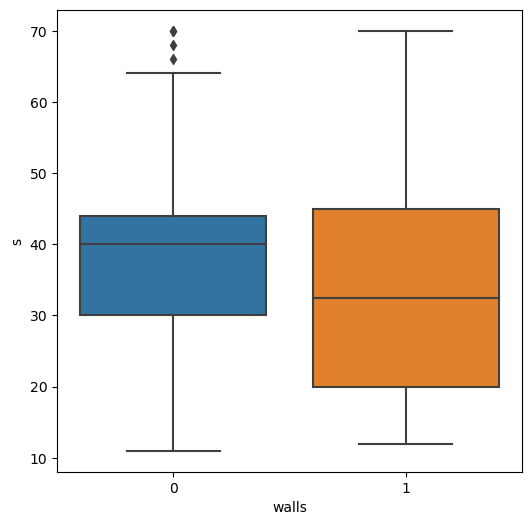

In [51]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='s', data=df)

In [52]:
print(stats.shapiro(df_w0['s']))
print(stats.shapiro(df_w1['s']))

ShapiroResult(statistic=0.9625374674797058, pvalue=0.11355537921190262)
ShapiroResult(statistic=0.9499643445014954, pvalue=0.0034307457972317934)


In [53]:
scipy.stats.mannwhitneyu(df_f0['s'],df_f1['s'])

MannwhitneyuResult(statistic=407.5, pvalue=3.1081716140374413e-06)

In [54]:
'''
Связь мебель - площадь
'''

'\nСвязь мебель - площадь\n'

In [55]:
df.groupby('furniture')[['s']].mean()

,s
furniture,
0,21.904762
1,39.010185


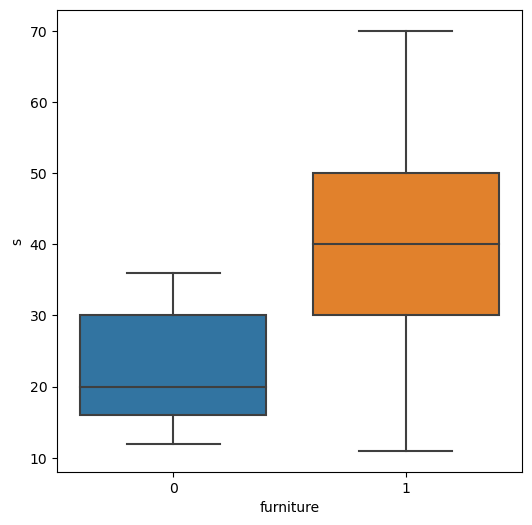

In [56]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='furniture', y='s', data=df)

In [57]:
scipy.stats.mannwhitneyu(df_f0['s'],df_f1['s'])

MannwhitneyuResult(statistic=407.5, pvalue=3.1081716140374413e-06)

In [58]:
'''
Связь район - площадь
'''

'\nСвязь район - площадь\n'

In [59]:
df.groupby('district')[['s']].mean()

,s
district,
1,37.078947
2,32.711628
3,38.697917


In [60]:
df_s_d1=np.array(df[df['district']==1]['s'])
df_s_d2=np.array(df[df['district']==2]['s'])
df_s_d3=np.array(df[df['district']==3]['s'])

print(stats.shapiro(df_s_d1))
print(stats.shapiro(df_s_d2))
print(stats.shapiro(df_s_d3))

ShapiroResult(statistic=0.9786481857299805, pvalue=0.6694725155830383)
ShapiroResult(statistic=0.9183208346366882, pvalue=0.004724521655589342)
ShapiroResult(statistic=0.9602149128913879, pvalue=0.10299959033727646)


In [61]:
'''
По второй совокупности отклоняем нулевую гипотезу о нормальности.
Используем метод Краскалл-Уоллеса
'''

'\nПо второй совокупности отклоняем нулевую гипотезу о нормальности.\nИспользуем метод Краскалл-Уоллеса\n'

In [62]:
stats.mstats.kruskalwallis(df_s_d1,df_s_d2,df_s_d3)

KruskalResult(statistic=3.548655042768554, pvalue=0.1695974618261066)

In [63]:
'''
P-value > 0.05. Нет основания отклонить нулевую гипотезу о равенстве оказателей.
'''

'\nP-value > 0.05. Нет основания отклонить нулевую гипотезу о равенстве оказателей.\n'

In [64]:
'''
Корреляционный анализ
Анализ связиколичественных и порядковых признаков
'''

'\nКорреляционный анализ\nАнализ связиколичественных и порядковых признаков\n'

In [65]:
'''
Построим скаттерплоты
'''

'\nПостроим скаттерплоты\n'

<AxesSubplot:xlabel='s', ylabel='rent'>

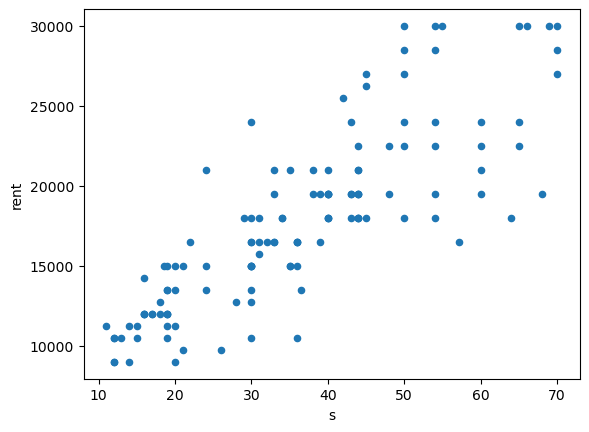

In [66]:
df.plot("s",'rent',kind="scatter")

<AxesSubplot:xlabel='rooms', ylabel='rent'>

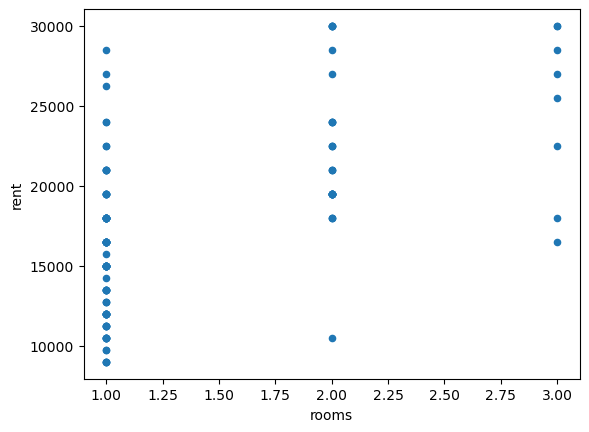

In [67]:
df.plot('rooms','rent',kind="scatter")

In [68]:
'''
Boxplot
'''

'\nBoxplot\n'

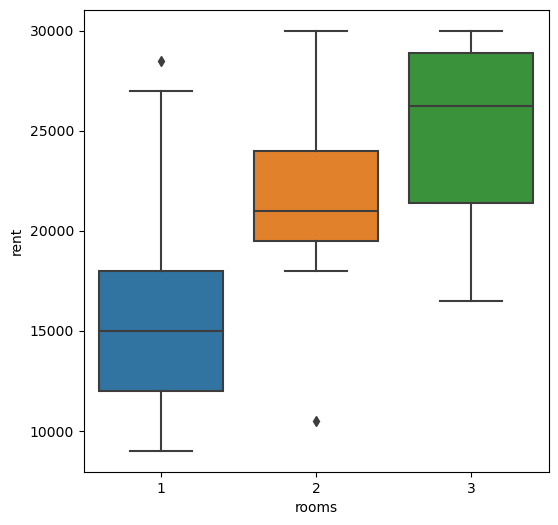

In [69]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='rooms', y='rent', data=df)

In [70]:
'''
Критерии Пирсона и Спирмена
'''

'\nКритерии Пирсона и Спирмена\n'

In [71]:
df[['rent','s','rooms']].corr(method='pearson') # количественная корреляция Пирсона

,rent,s,rooms
rent,1.000000,0.829281,0.592777
s,0.829281,1.000000,0.730449
rooms,0.592777,0.730449,1.000000


In [72]:
df[['rent','s','rooms']].corr() # то же самое

,rent,s,rooms
rent,1.000000,0.829281,0.592777
s,0.829281,1.000000,0.730449
rooms,0.592777,0.730449,1.000000


In [73]:
df[['rent','s','rooms','floor']].corr(method='spearman') # ранговая корреляция Спирмена

,rent,s,rooms,floor
rent,1.000000,0.857035,0.599251,0.383969
s,0.857035,1.000000,0.715424,0.413951
rooms,0.599251,0.715424,1.000000,0.158063
floor,0.383969,0.413951,0.158063,1.000000


In [74]:
'''
И графически
'''

'\nИ графически\n'

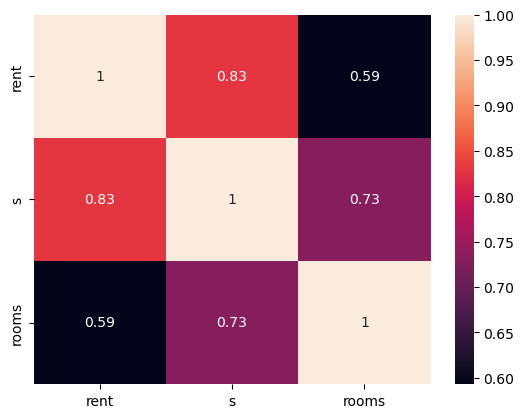

In [75]:
num = ['rent', 's', 'rooms']
hm = sns.heatmap(df[num].corr(),annot=True)

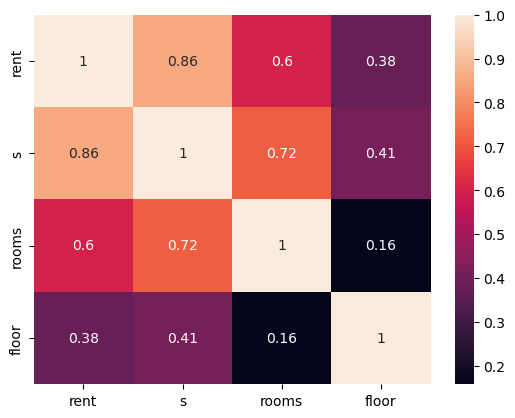

In [76]:
ran = ['rent', 's','rooms','floor']
hm = sns.heatmap(df[ran].corr(method = 'spearman'), annot=True)

In [77]:
scipy.stats.pearsonr(df.rent, df.s)

PearsonRResult(statistic=0.8292807418898441, pvalue=6.8188100336920634e-34)

In [78]:
scipy.stats.pearsonr(df.rent, df.rooms)

PearsonRResult(statistic=0.5927766527431151, pvalue=1.353604808672435e-13)

In [79]:
scipy.stats.pearsonr(df.s, df.rooms)

PearsonRResult(statistic=0.7304486159283052, pvalue=8.943660271029941e-23)

In [80]:
'''
Связь категориальных признаков
'''

'\nСвязь категориальных признаков\n'

In [81]:
WF=pd.crosstab(df['walls'],df['furniture']); WF

furniture,0,1
walls,,
0,7,42
1,14,66


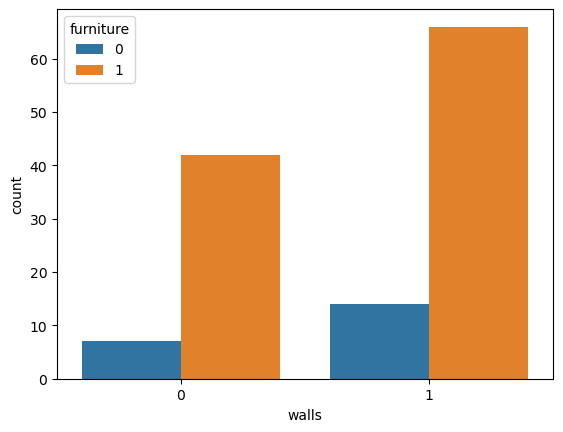

In [82]:
sns.countplot(x=df['walls'], hue=df['furniture']);

In [83]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, f, prob))

test Statistics: 0.054879585762876604
degrees of freedom: 1
p-value: 0.8147800917238359



In [84]:
WD=pd.crosstab(df['walls'],df['district']); WD

district,1,2,3
walls,,,
0,9,23,17
1,29,20,31


<AxesSubplot:xlabel='district', ylabel='count'>

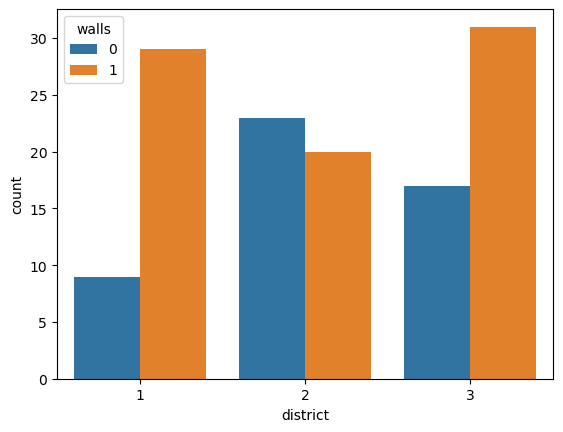

In [85]:
sns.countplot(x=df['district'], hue=df['walls'])

In [86]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WD)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, f, prob))

test Statistics: 7.820993051825996
degrees of freedom: 2
p-value: 0.020030552903560955



In [87]:
FS=pd.crosstab(df['floor'],df['s']); FS

s,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,18.5,19.0,...,54.0,55.0,57.1,60.0,64.0,65.0,66.0,68.0,69.0,70.0
floor,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,2,1,1,0,1,1,...,2,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,2,1,1,0,0,1,2,0,4,...,2,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [88]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(FS)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, f, prob))

test Statistics: 496.9223573621367
degrees of freedom: 430
p-value: 0.014052838884286786



In [89]:
df[['floor','s']].corr(method='pearson')

,floor,s
floor,1.000000,0.414633
s,0.414633,1.000000


In [90]:
df[['floor','s']].corr(method='spearman')

,floor,s
floor,1.000000,0.413951
s,0.413951,1.000000


In [91]:
'''
Регрессионный анализ
Парная регреси
'''

'\nРегрессионный анализ\nПарная регреси\n'

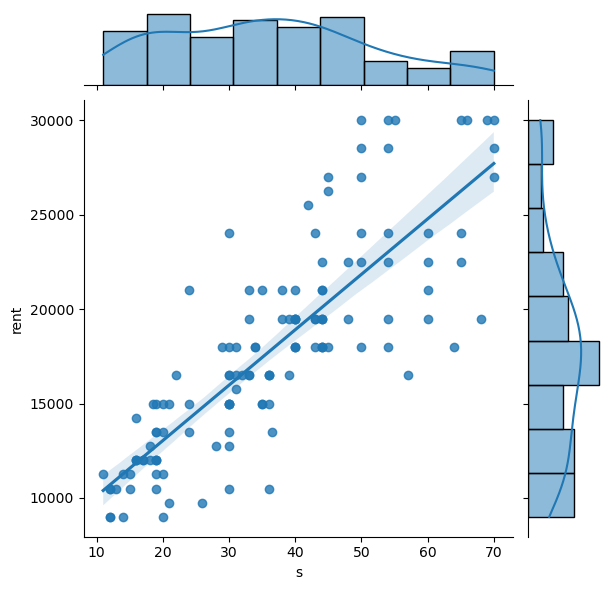

In [92]:
#sns.set(style="darkgrid")
sns.jointplot(x='s', y='rent', data=df, kind="reg")

In [ ]:
'''
Воспользуемся функцией LinearRegression()
'''

In [93]:
LR = lm.LinearRegression()

In [ ]:
'''
Создадим модель mod1 и подадим в fit факторный признак и целевой показатель
и выведем коэфициэнты полученного уравнения: intercept_ (свободный коэфициент a) и coef_ (значение перед фактором b)
'''

In [94]:
mod1 = LR.fit(df[['s']],df[['rent']])

In [95]:
mod1.intercept_, mod1.coef_

(array([7169.9792472]), array([[293.3433218]]))

In [96]:
mod1.intercept_, mod1.coef_

(array([7169.9792472]), array([[293.3433218]]))

In [97]:
r2 = mod1.score(df[['s']],df[['rent']])
r2

0.68770654886937

In [98]:
'''
Парная регрессия (OLS). Статистический подход.
'''

'\nПарная регрессия (OLS). Статистический подход.\n'

In [99]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
'''
OLS - метод наиеньших квадратов
Показываем связь 'rent ~ s', используем dataframe df.
Fit и summary
'''

In [100]:
results1 = smf.ols('rent ~ s', data=df).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     279.7
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           6.82e-34
Time:                        21:41:09   Log-Likelihood:                -1219.1
No. Observations:                 129   AIC:                             2442.
Df Residuals:                     127   BIC:                             2448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7169.9792    691.601     10.367      0.000    5801.426    8538.532
s            293.3433     17.541     16.723      0.000     258.633     328.054
==============================================================================
Omnibus:                        4.016   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.936
Skew:                           0.233   Prob(JB):                        0.140
Kurtosis:                       3.718   Cond. No.                         99.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''
Стандартные ошибки предполагают, что ковариационная матрица ошибок задана правильно.

Используется статистика Фишера. P-value 7*10**-34, близок к нулю. Вывод-модель адекватна.

Коэфициэнты. P-value меньше чем 0.05, онизначимы и остаются в модели.
Коэфициэнеты лежат внутри 95% области.

Метод Дурбина-Ватсона показывает, что корреляции по остаткам (значениям,невожедшим в доверительный интервал) нет, 
т.к. он близок к 2. Это закономерно.
Остатки блтизки к Гауссовскому распределению, т.к. p-value = 0.14. т.е. больше 0.05 и мы не можен отклонить Н0 
о нормальности распределения остатков.
'''

In [101]:
'''
МНОЖЕСТВЕННАЯ РЕГРЕССИЯ.
Построим модель с учетом других факторов.
'''

'\nМНОЖЕСТВЕННАЯ РЕГРЕССИЯ\n'

In [102]:
X=df[['s','rooms','floor','walls','furniture']]
X

,s,rooms,floor,walls,furniture
0,35.0,1,5,1,1
1,31.0,1,2,0,1
2,30.0,1,4,1,1
3,55.0,2,1,1,1
...,...,...,...,...,...
126,54.0,2,1,1,1
127,54.0,2,3,0,1
128,12.0,1,4,1,0
129,68.0,2,4,0,1


In [103]:
Y=df[['rent']]

In [ ]:
'''
Построим множественнуюмодель mod_m
'''

In [104]:
mod_m = LR.fit(X,Y)

In [105]:
mod_m.intercept_, mod_m.coef_

(array([5136.07119279]),
 array([[ 291.03500937, -113.95073467,  -11.82303603, 1762.70452924,
         1468.04676977]]))

In [106]:
r2 = mod_m.score(X,Y)
r2

0.720081669302074

In [ ]:
'''
Попробуем предсказать
'''

In [107]:
x_new_app = [[54,2,5,1,1]]

In [108]:
y_new_app=mod_m.predict(x_new_app)
print("Прогноз цены: ",y_new_app.round(0))

Прогноз цены:  [[23796.]]


In [ ]:
'''
Множественная регрессия (OLS)
'''

In [109]:
resultsm = smf.ols('rent ~ s + rooms + floor + walls + furniture' , data=df).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     63.28
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           2.27e-32
Time:                        21:46:55   Log-Likelihood:                -1212.1
No. Observations:                 129   AIC:                             2436.
Df Residuals:                     123   BIC:                             2453.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5136.0712    934.370      5.497      0.000    3286.544    6985.599
s            291.0350     28.759     10.120      0.000     234.107     347.963
rooms       -113.9507    661.936     -0.172      0.864   -1424.213    1196.311
floor        -11.8230    110.648     -0.107      0.915    -230.844     207.198
walls       1762.7045    548.487      3.214      0.002     677.008    2848.401
furniture   1468.0468    779.195      1.884      0.062     -74.322    3010.415
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.098
Skew:                           0.058   Prob(JB):                        0.952
Kurtosis:                       3.070   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''
P-value у rooms и floor больше 0.05, следовательноэтипараметры не нужны в модели.
S и rooms коррелированы ипоявился эффект мультиколлинеарности, количество комнат нужно исключить.
Floor не значим, можем его убрать.
Мебель. P-value в зоне принятия решений. Можно пересчитать с убранными показателями. s+walls
'''

In [110]:
resultsm = smf.ols('rent ~ s + walls' , data=df).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     155.6
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           9.03e-35
Time:                        21:48:05   Log-Likelihood:                -1213.9
No. Observations:                 129   AIC:                             2434.
Df Residuals:                     126   BIC:                             2442.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5780.7436    792.223      7.297      0.000    4212.958    7348.529
s            301.2093     17.088     17.627      0.000     267.392     335.027
walls       1780.6596    547.995      3.249      0.001     696.194    2865.125
==============================================================================
Omnibus:                        0.498   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.203
Skew:                           0.061   Prob(JB):                        0.904
Kurtosis:                       3.151   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
'''
Влияние категориальных факторов. Dummy variables
Добавим район, как dummies
'''

'\nВлияние категориальных факторов. Dummy variables\n'

In [113]:
df01 = pd.concat((df,pd.get_dummies(df.district, prefix="d", prefix_sep='',)),1)
df01.head()

,rent,s,floor,rooms,district,walls,furniture,d1,d2,d3
0,15000,35.0,5,1,3,1,1,0,0,1
1,16500,31.0,2,1,2,0,1,0,1,0
2,18000,30.0,4,1,3,1,1,0,0,1
3,30000,55.0,1,2,3,1,1,0,0,1
4,12000,19.0,3,1,2,1,1,0,1,0


In [ ]:
'''
Добавим первый и второй район, третий оставим как базисный, чтобы OLS работал.
'''

In [114]:
resultsm = smf.ols('rent ~ s + walls + furniture + d1 + d2 ', data=df01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     84.02
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           5.54e-38
Time:                        21:50:46   Log-Likelihood:                -1198.4
No. Observations:                 129   AIC:                             2409.
Df Residuals:                     123   BIC:                             2426.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5846.8087    918.142      6.368      0.000    4029.402    7664.215
s            272.2591     17.030     15.987      0.000     238.549     305.969
walls       1039.6924    510.858      2.035      0.044      28.481    2050.904
furniture   1696.6245    707.027      2.400      0.018     297.107    3096.142
d1          1819.9582    591.295      3.078      0.003     649.526    2990.390
d2         -1543.0576    583.148     -2.646      0.009   -2697.364    -388.751
==============================================================================
Omnibus:                        0.210   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.305
Skew:                          -0.091   Prob(JB):                        0.858
Kurtosis:                       2.846   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''
Все p-value меньше 0.05. Они значимы.
'''

In [115]:
x_new_app = pd.array([1,40,1,1,0,0]) # Первая единица на Intercept

In [116]:
rp=resultsm.params; rp

Intercept    5846.808708
s             272.259079
walls        1039.692382
furniture    1696.624516
d1           1819.958212
d2          -1543.057589
dtype: float64

In [117]:
y_new_app=np.dot(rp,x_new_app) # скалярное произведение векторов
print('Прогноз цены:', round(y_new_app, 2))

Прогноз цены: 19473.49


In [118]:
'''
Убедимся, что комнаты все-таки влияют на арендную плату.
Невключая в модель площадь.
'''

'\nУбедимся, что комнаты все-таки влияют на арендную плату\n'

In [119]:
results2 = smf.ols('rent ~ rooms', data=df01).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     68.80
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.35e-13
Time:                        21:52:59   Log-Likelihood:                -1266.3
No. Observations:                 129   AIC:                             2537.
Df Residuals:                     127   BIC:                             2542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.033e+04    982.399     10.515      0.000    8385.934    1.23e+04
rooms       5472.6681    659.781      8.295      0.000    4167.080    6778.256
==============================================================================
Omnibus:                        3.962   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.559
Skew:                           0.401   Prob(JB):                        0.169
Kurtosis:                       3.140   Cond. No.                         5.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
rp = results2.params; rp

Intercept    10329.925651
rooms         5472.668131
dtype: float64

In [123]:
'''
rooms 	5472.67 - предсказанная поправка стоимости аренды одной комнаты.
Intercept    10329.93 - предсказанная базовая аренда любой квартиры, 
вне зависимости от количества комнат.
'''

'\nrooms \t5472.67 - предсказанная поправка стоимости аренды одной комнаты.\n'